In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
data = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
#unique values
for col in data.columns:
    print(col,": ",data[col].unique())

id :  [ 9046 51676 31112 ... 19723 37544 44679]
gender :  ['Male' 'Female' 'Other']
age :  [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e

In [5]:
#Numbers of entries for each class
stroke = len(data[data['stroke']==1])
no_stroke = len(data[data['stroke']==0])
print("Stroke: ",len(data[data['stroke']==1]))
print("No Stroke: ",len(data[data['stroke']==0]))

Stroke:  249
No Stroke:  4861


Given that we have much more data for the class "no stroke", we can say that the dataset is highly imbalanced. 

In [6]:
#Number of entries for each gender category
for gen in data['gender'].unique():
    print(gen,": ",len(data[data['gender']==gen]))

Male :  2115
Female :  2994
Other :  1


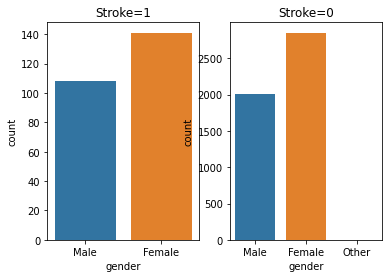

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplot(1,2,1)
plt.title('Stroke=1')
ax1 = sns.countplot(x="gender", data=data[data["stroke"]==1])

plt.subplot(1,2,2)
plt.title('Stroke=0')
ax2 = sns.countplot(x="gender", data=data[data["stroke"]==0])

In [8]:
print("No Stroke")
for gen in data[data['stroke']==0]['gender'].unique():
    print(gen,": ",len(data.loc[(data['gender']==gen) & (data['stroke']==0)])/no_stroke)
    
print("Stroke")
for gen in data[data['stroke']==1]['gender'].unique():
    print(gen,": ",len(data.loc[(data['gender']==gen) & (data['stroke']==1)])/stroke)

No Stroke
Male :  0.41287800864019747
Female :  0.5869162723719399
Other :  0.0002057189878625797
Stroke
Male :  0.43373493975903615
Female :  0.5662650602409639


There is only one entry for other gender with no stroke. Comparing males and females, we can see there is a high percentage of females in the data. We cannot infer anything based on gender since females are having high number both for stroke and no stroke.

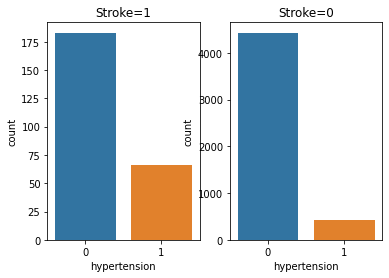

In [9]:
#Hypertension
plt.subplot(1,2,1)
plt.title('Stroke=1')
ax1 = sns.countplot(x="hypertension", data=data[data["stroke"]==1])

plt.subplot(1,2,2)
plt.title('Stroke=0')
ax2 = sns.countplot(x="hypertension", data=data[data["stroke"]==0])

In [10]:
print("No Stroke")
for i in data[data['stroke']==0]['hypertension'].unique():
    print(i,": ",len(data.loc[(data['hypertension']==i) & (data['stroke']==0)])/no_stroke)
    
print("Stroke")
for i in data[data['stroke']==1]['hypertension'].unique():
    print(i,": ",len(data.loc[(data['hypertension']==i) & (data['stroke']==1)])/stroke)

No Stroke
0 :  0.9111293972433656
1 :  0.08887060275663444
Stroke
0 :  0.7349397590361446
1 :  0.26506024096385544


The data has high percentage of people not having hypertension, although people having hypertension has a slightly higher chance of having stroke.

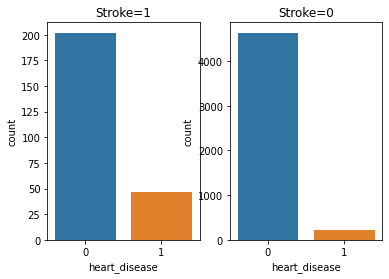

In [11]:
#Heart Disease
plt.subplot(1,2,1)
plt.title('Stroke=1')
ax1 = sns.countplot(x="heart_disease", data=data[data["stroke"]==1])

plt.subplot(1,2,2)
plt.title('Stroke=0')
ax2 = sns.countplot(x="heart_disease", data=data[data["stroke"]==0])

In [12]:
print("No Stroke")
for i in data[data['stroke']==0]['heart_disease'].unique():
    print(i,": ",len(data.loc[(data['heart_disease']==i) & (data['stroke']==0)])/no_stroke)
    
print("Stroke")
for i in data[data['stroke']==1]['heart_disease'].unique():
    print(i,": ",len(data.loc[(data['heart_disease']==i) & (data['stroke']==1)])/stroke)

No Stroke
0 :  0.9528903517794692
1 :  0.04710964822053076
Stroke
1 :  0.18875502008032127
0 :  0.8112449799196787


Again most of the people are not having heart_disease, but people having heart disease have slightly higher chance of having a stroke.

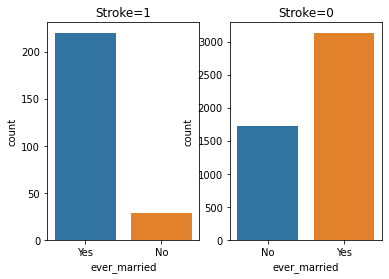

In [13]:
#Marital Status
plt.subplot(1,2,1)
plt.title('Stroke=1')
ax1 = sns.countplot(x="ever_married", data=data[data["stroke"]==1])

plt.subplot(1,2,2)
plt.title('Stroke=0')
ax2 = sns.countplot(x="ever_married", data=data[data["stroke"]==0])

In [14]:
print("No Stroke")
for i in data[data['stroke']==0]['ever_married'].unique():
    print(i,": ",len(data.loc[(data['ever_married']==i) & (data['stroke']==0)])/no_stroke)
    
print("Stroke")
for i in data[data['stroke']==1]['ever_married'].unique():
    print(i,": ",len(data.loc[(data['ever_married']==i) & (data['stroke']==1)])/stroke)

No Stroke
No :  0.35548241102653777
Yes :  0.6445175889734622
Stroke
Yes :  0.8835341365461847
No :  0.11646586345381527


There is a higher percentage of married people, although married people have a higher chance of stroke.

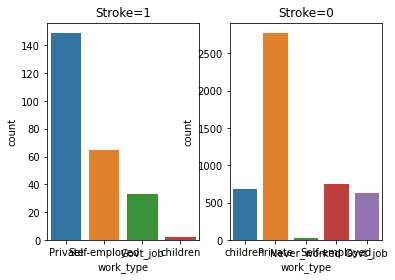

In [15]:
#Work-type
plt.subplot(1,2,1)
plt.title('Stroke=1')
ax1 = sns.countplot(x="work_type", data=data[data["stroke"]==1])

plt.subplot(1,2,2)
plt.title('Stroke=0')
ax2 = sns.countplot(x="work_type", data=data[data["stroke"]==0])

In [16]:
print("No Stroke")
for i in data[data['stroke']==0]['work_type'].unique():
    print(i,": ",len(data.loc[(data['work_type']==i) & (data['stroke']==0)])/no_stroke)
    
print("Stroke")
for i in data[data['stroke']==1]['work_type'].unique():
    print(i,": ",len(data.loc[(data['work_type']==i) & (data['stroke']==1)])/stroke)

No Stroke
children :  0.1409175066858671
Private :  0.5710759103065213
Never_worked :  0.004525817732976754
Self-employed :  0.1551121168483851
Govt_job :  0.12836864842624973
Stroke
Private :  0.5983935742971888
Self-employed :  0.26104417670682734
Govt_job :  0.13253012048192772
children :  0.008032128514056224


Children and people who have never worked have a much lower chance of having a stroke. Again data is dominated by one category, people doing private jobs who have almost equal probability of having and not having a stroke. Self-employed people have a higher chances of stroke. 

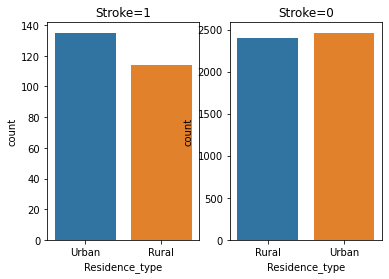

In [17]:
#Residence type
plt.subplot(1,2,1)
plt.title('Stroke=1')
ax1 = sns.countplot(x="Residence_type", data=data[data["stroke"]==1])

plt.subplot(1,2,2)
plt.title('Stroke=0')
ax2 = sns.countplot(x="Residence_type", data=data[data["stroke"]==0])

In [18]:
print("No Stroke")
for i in data[data['stroke']==0]['Residence_type'].unique():
    print(i,": ",len(data.loc[(data['Residence_type']==i) & (data['stroke']==0)])/no_stroke)
    
print("Stroke")
for i in data[data['stroke']==1]['Residence_type'].unique():
    print(i,": ",len(data.loc[(data['Residence_type']==i) & (data['stroke']==1)])/stroke)

No Stroke
Rural :  0.4937255708701913
Urban :  0.5062744291298087
Stroke
Urban :  0.5421686746987951
Rural :  0.4578313253012048


People living in urban areas have a higher chance of stroke compared to rural. 

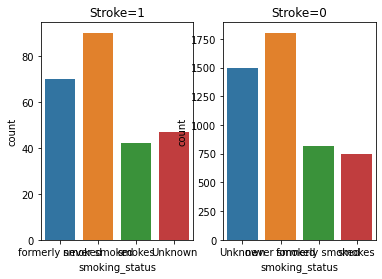

In [19]:
#Smoking status
plt.subplot(1,2,1)
plt.title('Stroke=1')
ax1 = sns.countplot(x="smoking_status", data=data[data["stroke"]==1])

plt.subplot(1,2,2)
plt.title('Stroke=0')
ax2 = sns.countplot(x="smoking_status", data=data[data["stroke"]==0])

In [20]:
print("No Stroke")
for i in data[data['stroke']==0]['smoking_status'].unique():
    print(i,": ",len(data.loc[(data['smoking_status']==i) & (data['stroke']==0)])/no_stroke)
    
print("Stroke")
for i in data[data['stroke']==1]['smoking_status'].unique():
    print(i,": ",len(data.loc[(data['smoking_status']==i) & (data['stroke']==1)])/stroke)

No Stroke
Unknown :  0.3079613248302818
never smoked :  0.37070561612836866
formerly smoked :  0.16766097510800246
smokes :  0.15367208393334705
Stroke
formerly smoked :  0.28112449799196787
never smoked :  0.3614457831325301
smokes :  0.1686746987951807
Unknown :  0.18875502008032127


People formerly smoked and never smoked have a higher chance of stroke than people who smokes or unkown.

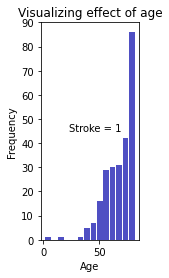

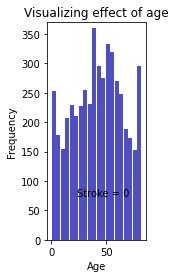

In [21]:
#Age

plt.subplot(1,3,1)
n, bins, patches = plt.hist(x=data[data["stroke"]==1]["age"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Visualizing effect of age')
plt.text(23, 45,"Stroke = 1")
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

plt.subplot(1,3,2)
n, bins, patches = plt.hist(x=data[data["stroke"]==0]["age"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Visualizing effect of age')
plt.text(23, 75,"Stroke = 0")
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

Stroke is more prevalent in older people, hence age can be a good feature for classification. 

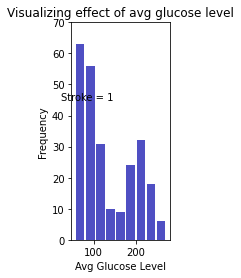

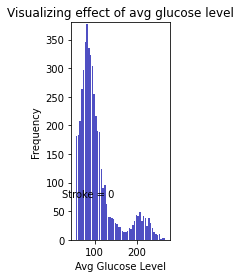

In [22]:
#Average glucose level

plt.subplot(1,3,1)
n, bins, patches = plt.hist(x=data[data["stroke"]==1]["avg_glucose_level"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('Avg Glucose Level')
plt.ylabel('Frequency')
plt.title('Visualizing effect of avg glucose level')
plt.text(23, 45,"Stroke = 1")
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

plt.subplot(1,3,2)
n, bins, patches = plt.hist(x=data[data["stroke"]==0]["avg_glucose_level"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('Avg Glucose Level')
plt.ylabel('Frequency')
plt.title('Visualizing effect of avg glucose level')
plt.text(23, 75,"Stroke = 0")
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

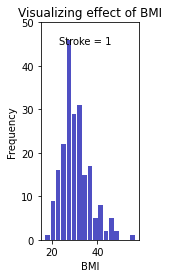

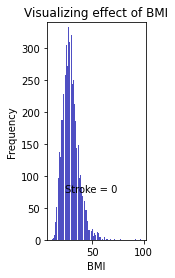

In [23]:
#BMI

plt.subplot(1,3,1)
n, bins, patches = plt.hist(x=data[data["stroke"]==1]["bmi"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Visualizing effect of BMI')
plt.text(23, 45,"Stroke = 1")
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

plt.subplot(1,3,2)
n, bins, patches = plt.hist(x=data[data["stroke"]==0]["bmi"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Visualizing effect of BMI')
plt.text(23, 75,"Stroke = 0")
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

<AxesSubplot:xlabel='age', ylabel='bmi'>

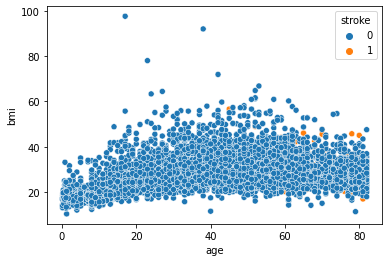

In [24]:
sns.scatterplot(data = data, x ='age', y = 'bmi', hue = 'stroke')

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

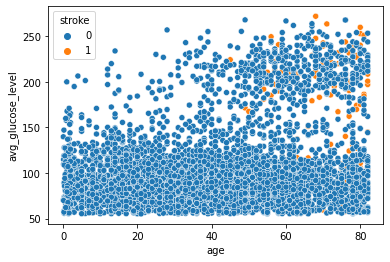

In [25]:
sns.scatterplot(data = data, x ='age', y = 'avg_glucose_level', hue = 'stroke')

<AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>

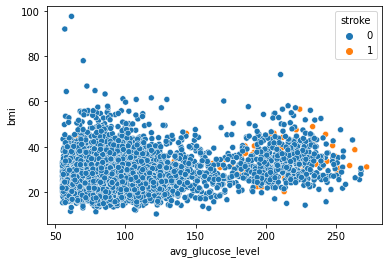

In [26]:
sns.scatterplot(data = data, x ='avg_glucose_level', y = 'bmi', hue = 'stroke')

In [27]:
#Encoding the categoircal features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = ['gender','ever_married','work_type','Residence_type','smoking_status']
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col.astype(str)))
data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [28]:
#Searching columns with nan values

print("Age: ", np.any(np.isnan(data["age"])))
print("Avg Glucose level: ", np.any(np.isnan(data["avg_glucose_level"])))
print("BMI: ", np.any(np.isnan(data["bmi"])))

Age:  False
Avg Glucose level:  False
BMI:  True


In [29]:
print("Number of nan values in bmi: ",len(np.where(np.isnan(data["bmi"]) == True)[0]))

Number of nan values in bmi:  201


Considering a large number of missing values in BMI, we need to come up with an efficient method for imputing missing values. 

<AxesSubplot:>

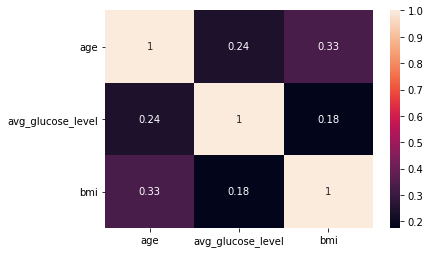

In [30]:
data_num = data[['age','avg_glucose_level','bmi']]
sns.heatmap(data_num.corr(), annot = True)

As we can infer, BMI is not having high correlation with any of the two numerical features.

We will use K-NearestNeighbor to compute the missing values in BMI

In [31]:
Y = data['stroke']
X = data.drop(['stroke','id'],axis=1)
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2


In [32]:
from sklearn.impute import KNNImputer

knn_impute = KNNImputer(n_neighbors=3,weights='distance').fit(X,Y)
X_imputed = knn_impute.transform(X)

Splitting the data between training and test sets with test size of 0.4

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_imputed, Y, test_size=0.4)

Feature: 0, Score: 0.03070
Feature: 1, Score: 0.23879
Feature: 2, Score: 0.02654
Feature: 3, Score: 0.02504
Feature: 4, Score: 0.02104
Feature: 5, Score: 0.04938
Feature: 6, Score: 0.03566
Feature: 7, Score: 0.26954
Feature: 8, Score: 0.23389
Feature: 9, Score: 0.06942


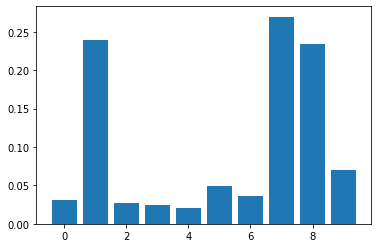

In [34]:
#Visualizing feature importance using decision trees

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
importance = model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Since we have such scarce data for the stroke class, I have used SMOTE method to oversample the data for better training of the model.

In [35]:
from imblearn.over_sampling import SMOTENC

oversample = SMOTENC([0,2,3,4,5,6,9])
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [36]:
#Verifying

print("Stroke: ",len(np.where(y_train == 1)[0]))
print("No Stroke: ",len(np.where(y_train == 0)[0]))

Stroke:  2930
No Stroke:  2930


In [37]:
from numpy import mean
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

ss = RobustScaler()
X_train_scaled = ss.fit_transform(X_train)
# define model
#model = GradientBoostingClassifier()
#parameters={'loss':('deviance', 'exponential'), 'learning_rate':[1, 0.5, 0.25, 0.1, 0.05, 0.01],
#    'n_estimators':[16, 32, 64, 100, 200,500,1000],'max_depth':np.linspace(1, 32, 32, endpoint=True),
#    'min_samples_split':np.linspace(0.1, 1.0, 10, endpoint=True),'min_samples_leaf':np.linspace(0.1, 0.5, 5, endpoint=True),
#    'max_features':list(range(1,X_train.shape[1]))}
#gridSearch = GridSearchCV(model, params,scoring='roc_auc',n_jobs=-1,cv=3,verbose=3)
#gridSearch.fit(X_train_scaled, y_train)
#print(gridSearch.cv_results_['params'])
#print(gridSearch.cv_results_['mean_test_score'])

In [38]:
model = GradientBoostingClassifier(loss='deviance',learning_rate=0.5,n_estimators=5500,max_depth=3,
                                  min_samples_split=0.1,min_samples_leaf=0.01,max_features=7)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
scores = cross_validate(model, X_train_scaled, y_train, scoring=('f1','roc_auc'), cv=cv, n_jobs=-1)
print('Mean F1 Score: %.3f' % mean(scores['test_f1']))
print('Mean ROC-AUC Score: %.3f' % mean(scores['test_roc_auc']))

Mean F1 Score: 0.952
Mean ROC-AUC Score: 0.990


In [39]:
print("Stroke: ",len(np.where(y_test == 1)[0]))
print("No Stroke: ",len(np.where(y_test == 0)[0]))

Stroke:  113
No Stroke:  1931


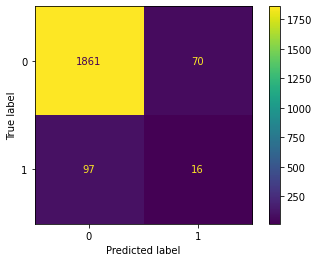

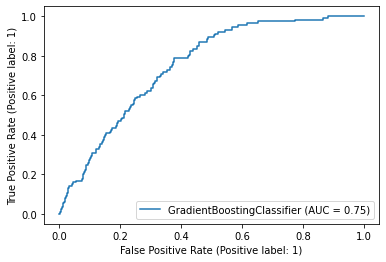

In [40]:
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

X_test_scaled = ss.transform(X_test)
model.fit(X_train_scaled,y_train)
y_predict = model.predict(X_test_scaled)

plot_confusion_matrix(model, X_test_scaled, y_test)  
plt.show()  

plot_roc_curve(model, X_test_scaled, y_test)  
plt.show()         